In [11]:
import optimiserBank as opt
import functionBank as func
import matplotlib.pyplot as plt
import importlib
importlib.reload(opt)
importlib.reload(func)
import numpy as np
import matplotlib.pyplot as plt
from itertools import product
from optimiserBank import MOobjective_function as objvFunc

functionDict = {
                func.binhAndKorn:[(0,5), (0,3)], 
                func.chankongHaimes:[(-20,20), (-20,20)], 
                func.fonsecaFleming:[(-4,4), (-4,4)], 
                func.ctp1:[(0,1), (0,1)], 
                func.constrEx:[(0.1,1), (0,5)], 
                func.testFunction4:[(-7,4), (-7,4)],
                func.viennetFunction:[(-3,3), (-3,3)]
                }

weights = np.array((0.5, 0.5))
scalarisingList = [func.chebyshev,
                    func.weightedSum, 
                    func.EWC, 
                    func.weightedPower,
                    func.weightedNorm, 
                    func.augmentedChebychev, 
                    func.modifiedChebychev, 
                    func.PBI, 
                    func.PAPBI]




In [12]:
def find_non_dominated_pairs(data):
    """
    Finds the non-dominated pairs in a 2D array of values for minimization.

    Args:
        data (list of tuple): List of tuples representing 2D points.

    Returns:
        numpy.ndarray: Non-dominated pairs as a numpy array of shape (x, 2).
    """
    non_dominated = []

    for i, (x, y) in enumerate(data):
        dominated = False
        for j, (x_other, y_other) in enumerate(data):
            if i != j and x_other <= x and y_other <= y and (x_other < x or y_other < y):
                dominated = True
                break

        if not dominated:
            non_dominated.append((x, y))

    return np.array(non_dominated)

[(0, 5), (0, 3)]
[[ 9.7056 33.2264]]


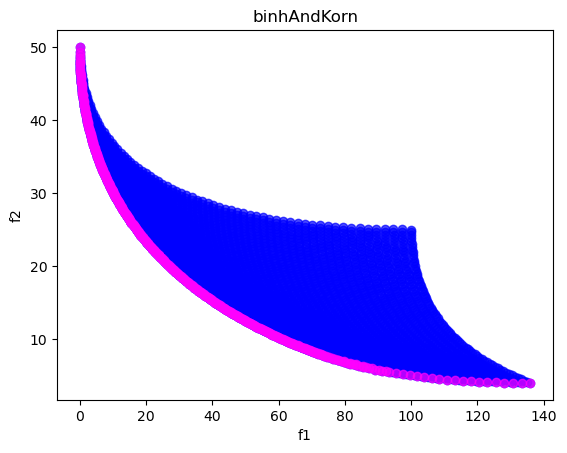

[array([[0.00000000e+00, 1.00000000e+00],
       [           nan,            nan],
       [           nan,            nan],
       ...,
       [9.60791475e-01, 3.96989234e-04],
       [9.80261462e-01, 9.92473084e-05],
       [1.00000000e+00, 0.00000000e+00]]), array([[1.34275770e-03, 9.42238067e-01],
       [1.87448975e-03, 9.33817925e-01],
       [5.37103081e-04, 9.71019786e-01],
       [5.85442358e-04, 9.62242354e-01],
       [3.63081683e-03, 9.02801156e-01],
       [1.20848193e-03, 9.56827421e-01],
       [1.25682121e-03, 9.48049989e-01],
       [1.40183904e-03, 9.39344015e-01],
       [5.12396339e-03, 8.80403023e-01],
       [6.04240966e-03, 8.72268714e-01],
       [2.34176943e-03, 9.25350145e-01],
       [2.58346582e-03, 9.16715629e-01],
       [7.99746487e-03, 8.50211992e-01],
       [3.55025136e-03, 9.11554769e-01],
       [4.13032269e-03, 8.94357195e-01],
       [4.56537619e-03, 8.85865595e-01],
       [1.15262321e-02, 8.20505288e-01],
       [1.42332316e-02, 8.04879792e-01],
 

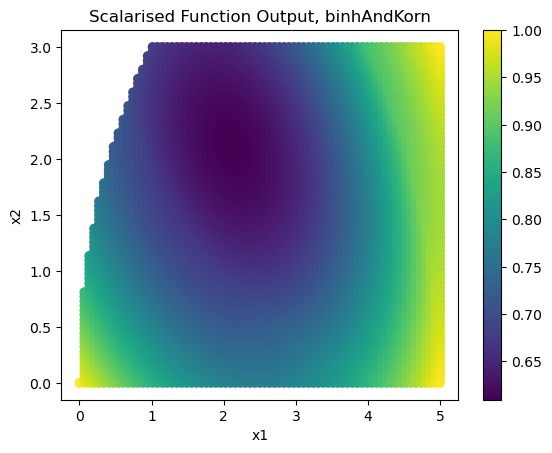

[(-20, 20), (-20, 20)]
[[nan nan]]


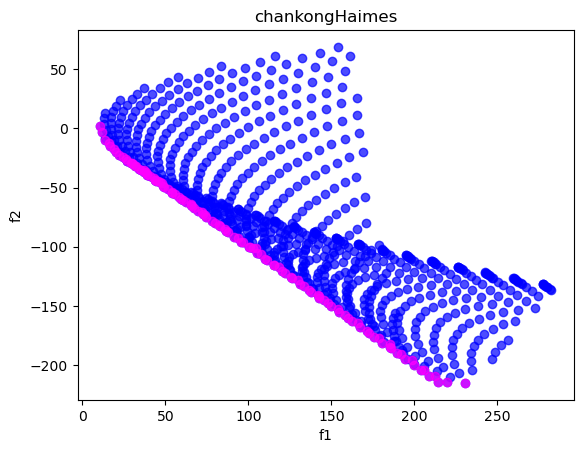

[array([[nan, nan],
       [nan, nan],
       [nan, nan],
       ...,
       [nan, nan],
       [nan, nan],
       [nan, nan]]), array([[0.77673869, 0.01714639],
       [0.7462109 , 0.03429278],
       [0.49586155, 0.26409557],
       [0.57820058, 0.18521188],
       [0.66913899, 0.0980897 ],
       [0.71783296, 0.05143916],
       [0.12049876, 0.61572525],
       [0.12619585, 0.61026724],
       [0.13404278, 0.6027496 ],
       [0.15618618, 0.58153545],
       [0.17048264, 0.56783894],
       [0.2055251 , 0.53426703],
       [0.2262711 , 0.51439164],
       [0.24916694, 0.49245662],
       [0.27421262, 0.46846197],
       [0.33075352, 0.41429381],
       [0.36224874, 0.38412028],
       [0.3958938 , 0.35188713],
       [0.4316887 , 0.31759436],
       [0.46963345, 0.28124195],
       [0.50972804, 0.24282993],
       [0.55197248, 0.20235827],
       [0.59636676, 0.15982699],
       [0.10996453, 0.61989599],
       [0.14640439, 0.58498533],
       [0.16285069, 0.56922918],
       [0.181

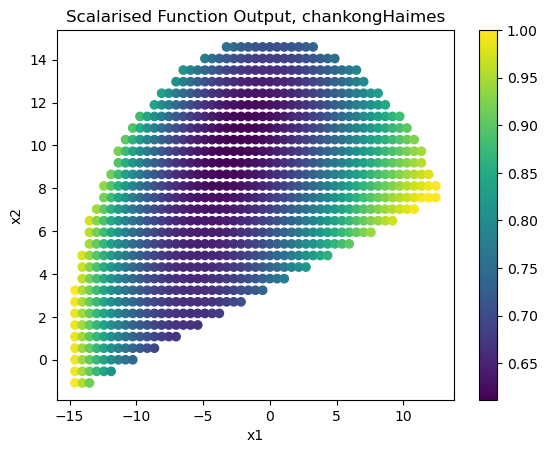

[(-4, 4), (-4, 4)]
[[0.50890121 0.99784872]]


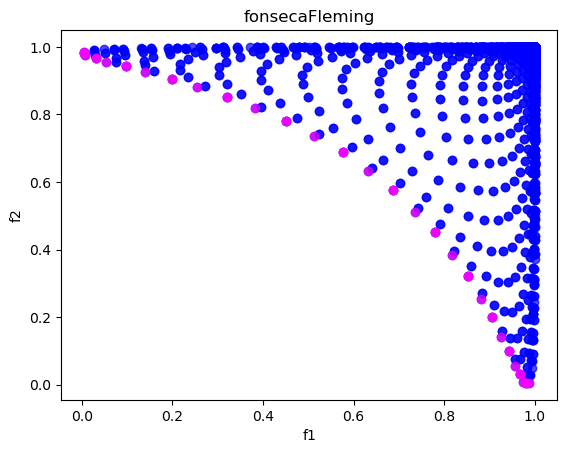

[array([[9.86169274e-01, 0.00000000e+00],
       [9.81240200e-01, 9.51779956e-04],
       [9.81240200e-01, 9.51779956e-04],
       [9.74554474e-01, 1.90265403e-03],
       [9.66283447e-01, 2.58903704e-02],
       [9.66283447e-01, 2.58903704e-02],
       [9.55323938e-01, 4.93015794e-02],
       [9.42169746e-01, 9.35868580e-02],
       [9.42169746e-01, 9.35868580e-02],
       [9.25142502e-01, 1.35809247e-01],
       [9.05340544e-01, 1.95100752e-01],
       [9.05340544e-01, 1.95100752e-01],
       [8.80300400e-01, 2.50324309e-01],
       [8.52133471e-01, 3.17890936e-01],
       [8.52133471e-01, 3.17890936e-01],
       [8.17338483e-01, 3.79367931e-01],
       [7.79568972e-01, 4.48350676e-01],
       [7.79568972e-01, 4.48350676e-01],
       [7.33989738e-01, 5.09666046e-01],
       [6.86402535e-01, 5.74235614e-01],
       [6.86402535e-01, 5.74235614e-01],
       [6.30302346e-01, 6.30302346e-01],
       [5.74235614e-01, 6.86402535e-01],
       [5.74235614e-01, 6.86402535e-01],
       [5.09666

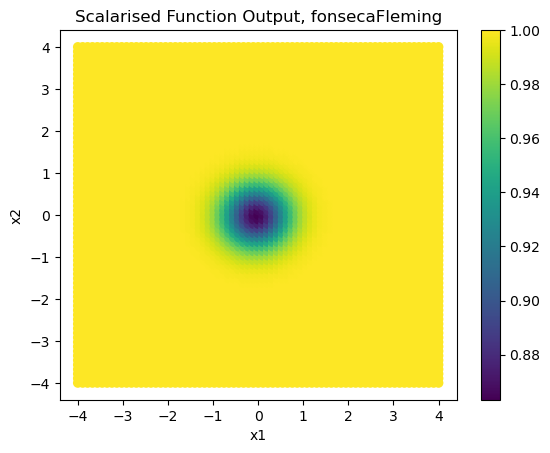

[(0, 1), (0, 1)]
[[0.42       2.11338459]]


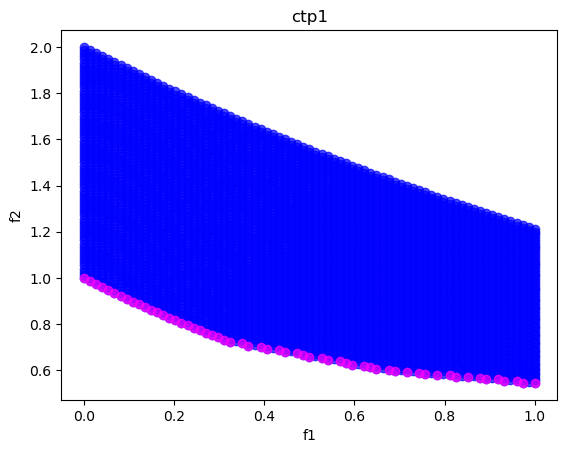

[array([[0.00000000e+00, 3.12566139e-01],
       [1.35135135e-02, 3.03338978e-01],
       [2.70270270e-02, 2.94235670e-01],
       [4.05405405e-02, 2.85254552e-01],
       [5.40540541e-02, 2.76393985e-01],
       [6.75675676e-02, 2.67652349e-01],
       [8.10810811e-02, 2.59028049e-01],
       [9.45945946e-02, 2.50519509e-01],
       [1.08108108e-01, 2.42125177e-01],
       [1.21621622e-01, 2.33843518e-01],
       [1.35135135e-01, 2.25673021e-01],
       [1.48648649e-01, 2.17612193e-01],
       [1.62162162e-01, 2.09659563e-01],
       [1.75675676e-01, 2.01813678e-01],
       [1.89189189e-01, 1.94073105e-01],
       [2.02702703e-01, 1.86436430e-01],
       [2.16216216e-01, 1.78902260e-01],
       [2.29729730e-01, 1.71469219e-01],
       [2.43243243e-01, 1.64135948e-01],
       [2.56756757e-01, 1.56901108e-01],
       [2.70270270e-01, 1.49763380e-01],
       [2.83783784e-01, 1.42721458e-01],
       [2.97297297e-01, 1.35774057e-01],
       [3.10810811e-01, 1.28919909e-01],
       [3.24324

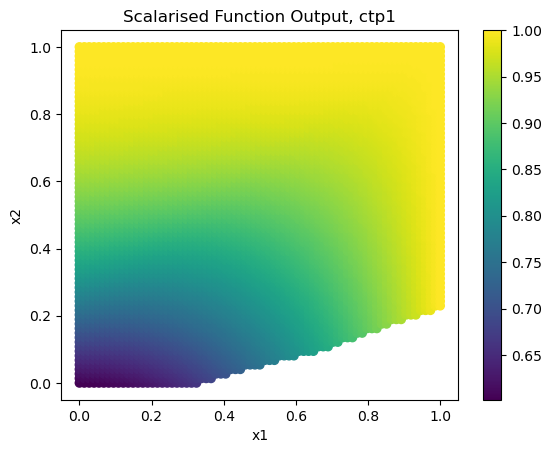

[(0.1, 1), (0, 5)]
[[nan nan]]


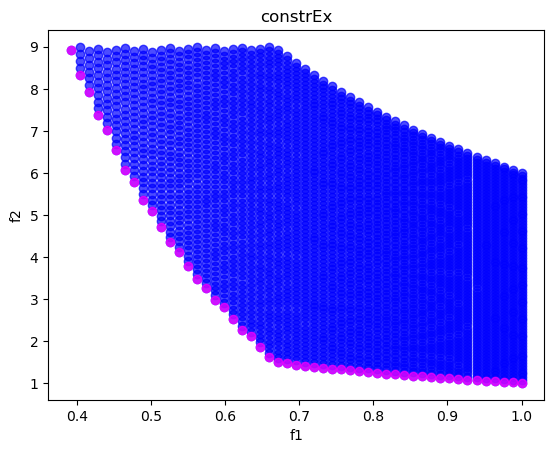

[array([[       nan,        nan],
       [       nan,        nan],
       [       nan,        nan],
       ...,
       [0.96      , 0.00311765],
       [0.98      , 0.00153963],
       [1.        , 0.        ]]), array([[0.02      , 0.93726474],
       [0.04      , 0.88592232],
       [0.06      , 0.8177709 ],
       [0.08      , 0.77256224],
       [0.1       , 0.71111819],
       [0.12      , 0.65288923],
       [0.14      , 0.61534224],
       [0.16      , 0.56238981],
       [0.18      , 0.52885991],
       [0.2       , 0.48046402],
       [0.22      , 0.43430753],
       [0.24      , 0.40594861],
       [0.26      , 0.3634812 ],
       [0.28      , 0.32285132],
       [0.3       , 0.29865427],
       [0.32      , 0.26105384],
       [0.34      , 0.23909544],
       [0.36      , 0.20417828],
       [0.38      , 0.17062448],
       [0.4       , 0.15165915],
       [0.42      , 0.12035303],
       [0.44      , 0.09020164],
       [0.46      , 0.07372297],
       [0.48      , 0.070187

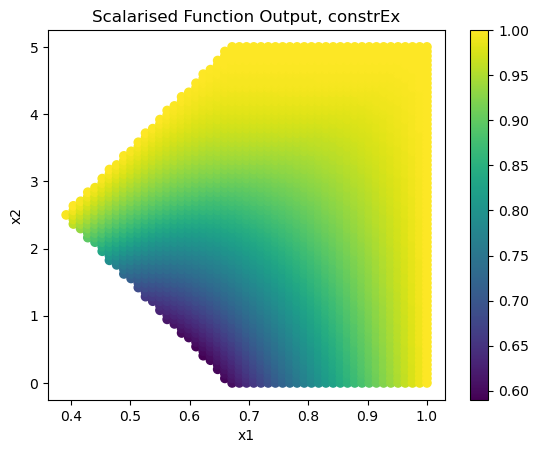

[(-7, 4), (-7, 4)]
[[-1.3236 -2.71  ]]


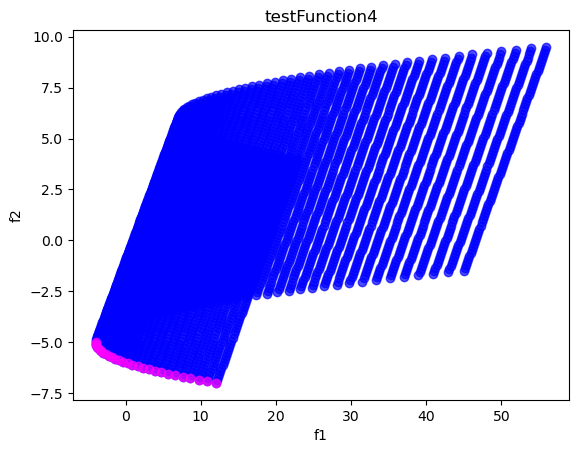

KeyboardInterrupt: 

In [13]:
for key, value in functionDict.items():

    functionOutput = np.zeros((0,2))

    print(value)

    x_range = np.linspace(value[0][0], value[0][1], 75)
    y_range = np.linspace(value[1][0], value[1][1], 75)
    fullRange = list(product(x_range, y_range))
    fullRangeArray = np.array(fullRange)
    
    # print(fullRangeArray[5])

    for i in range(0, len(fullRangeArray)):
        functionOutput = np.vstack((functionOutput, objvFunc(fullRangeArray[i], key, 2)))
    
    print(objvFunc([0.42, 1.5], key,2))

    nonDoms = find_non_dominated_pairs(functionOutput)
    np.savetxt(f'{key.__name__}Pareto.txt', nonDoms)
    # print(nonDoms)
    # print(nonDoms.shape)
    # plt.scatter(nonDoms[:,0], nonDoms[:,1], alpha = 0.7)
    plt.scatter(functionOutput[:,0], functionOutput[:,1], alpha = 0.7, c='blue')
    plt.scatter(nonDoms[:,0], nonDoms[:,1], alpha = 0.7, c='magenta')


    plt.xlabel('f1')
    plt.ylabel('f2')
    plt.title(f'{key.__name__}')
    plt.show()

    np.savetxt(f'{key.__name__}.txt', nonDoms)

    weights = np.array((0.5, 0.5))

    zbests = np.min(functionOutput, axis=0)

    scalarisedTargets = opt.scalariseValues(func.HypI, functionOutput, zbests, weights, 1, 100)

    plt.title(f'Scalarised Function Output, {key.__name__}')
    plt.scatter(fullRangeArray[:,0], fullRangeArray[:,1],c=scalarisedTargets, alpha = 1)
    plt.colorbar()
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.show()

        


In [ ]:
def removeNans(features, targets):
    """
    Removes NaN values from the outputs array and corresponding entries in the inputs array.

    Parameters:
        features (np.ndarray): Input array with function inputs.
        targets (np.ndarray): Output array with function outputs.

    Returns:
        tuple: A tuple containing cleaned inputs and outputs arrays.
    """
    # Create a boolean mask for non-NaN values in the outputs array
    mask = ~np.isnan(targets)

    # Log the indices of NaN values
    nan_indices = np.where(~mask)[0]
    if nan_indices.size > 0:
        print(f"NaN values found at indices: {nan_indices}")
    else:
        print("No NaN values found.")

    # Return the cleaned arrays
    return features[mask], targets[mask]

In [ ]:
print(functionOutput.shape)
np.savetxt('tf4nancheck.txt', functionOutput)

noNansFeatures, noNansTargets = removeNans(fullRangeArray, functionOutput)


(5625, 2)
No NaN values found.
